<a href="https://colab.research.google.com/github/ailunguo/Test/blob/main/Opencv_Test/Test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

教程：https://colab.research.google.com/github/farrokhkarimi/OpenCV/blob/master/Getting_Started_with_OpenCV.ipynb#scrollTo=V9OzTMt4Xnck

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

In [ ]:
cv.__version__

'4.8.0'

In [ ]:
img = cv.imread('/content/drive/MyDrive/zhihui/cat_2.jpg', 1)

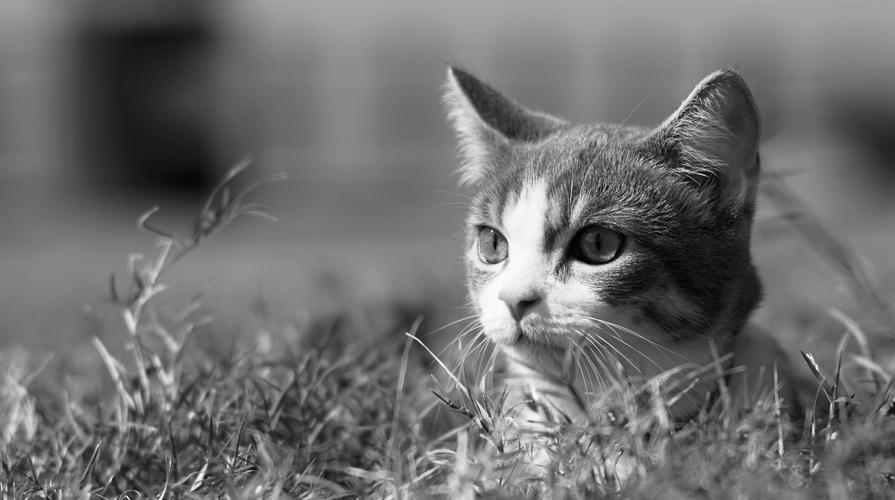

In [ ]:
cv2_imshow(img)
cv.waitKey(0)
cv.destroyAllWindows()

In [ ]:
cv.imwrite('cat.png', img)

True

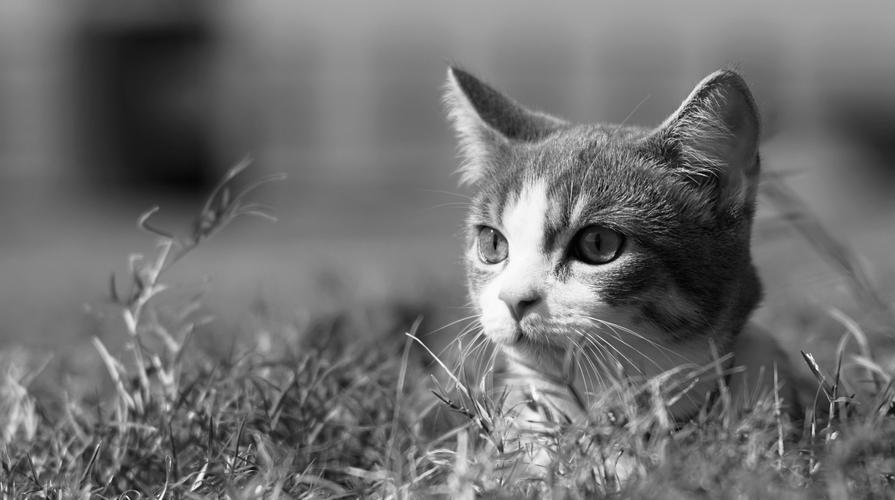

In [ ]:
cat = cv.imread('cat.png', 1)
cv2_imshow(cat)

可以用Matplotlib进行

In [ ]:
from matplotlib import pyplot as plt

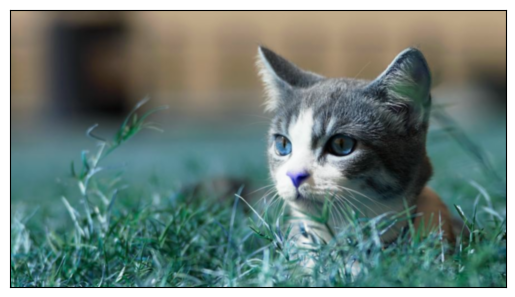

In [ ]:
cat = cv.imread('/content/drive/MyDrive/zhihui/cat_2.jpg', 1)
plt.imshow(cat, interpolation = 'bicubic')
plt.xticks([]), plt.yticks([]) # 隐藏x, y轴
plt.show()

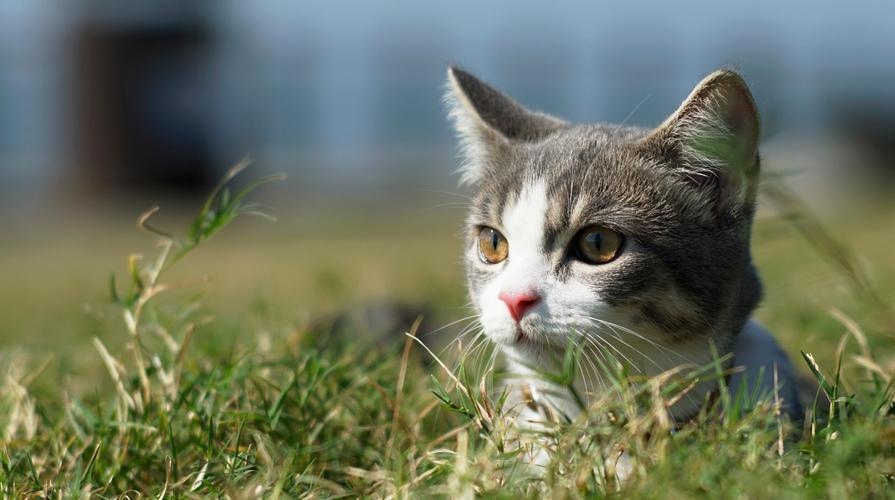

In [ ]:
cv2_imshow(cat)

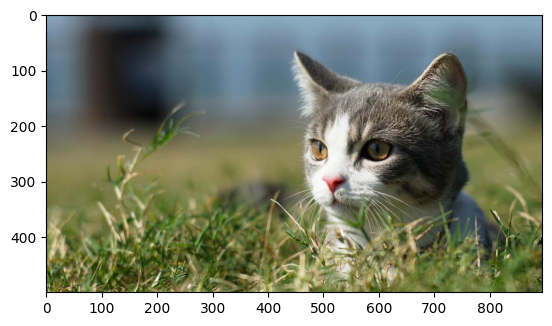

In [ ]:
# OpenCV加载的彩色图像处于BGR模式。但是Matplotlib以RGB模式显示。
# 因此，如果使用OpenCV读取彩色图像，则Matplotlib中将无法正确显示彩色图像
b,g,r = cv.split(cat)
img2 = cv.merge([r,g,b])
plt.imshow(img2)
plt.show()

用skimage来处理图像

In [ ]:
from skimage import io
import matplotlib.pyplot as plt

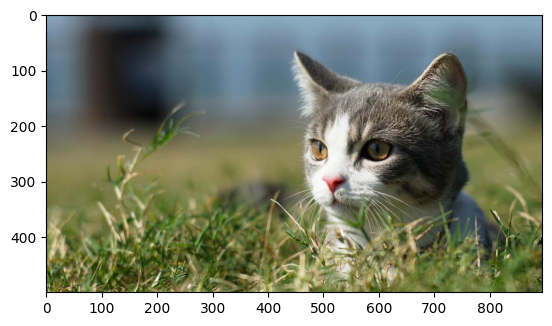

In [ ]:
image = io.imread('cat.png')
plt.imshow(image)
plt.show()

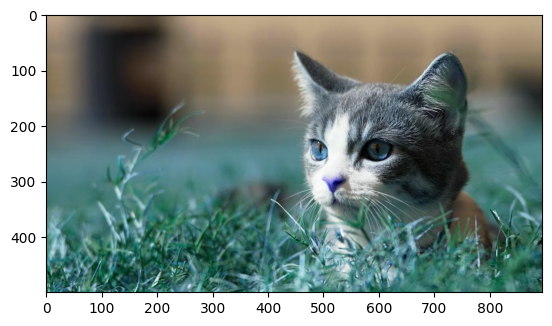

In [ ]:
io.imsave('cat.jpg', image)

image = cv.imread('cat.jpg')

plt.imshow(image)
plt.show()

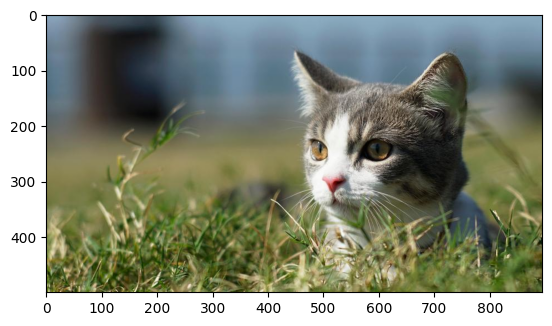

In [ ]:
# plt.imshow(image) 展示了一个错误的颜色通道(BGR)
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image)

处理视频

In [ ]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

In [ ]:
cap = cv.VideoCapture(700)

if not cap.isOpened():
 print("Cannot open camera")
 exit()

while True:
 # Capture frame-by-frame
 ret, frame = cap.read()

 # if frame is read correctly ret is True
 if not ret:
  print("Can't receive frame (stream end?). Exiting ...")
  break

 # Our operations on the frame come here
 gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)

 # Display the resulting frame
 cv2_imshow(gray)
 if cv.waitKey(1) == ord('q'):
  break
# When everything done, release the capture
cap.release()
cv.destroyAllWindows()

Cannot open camera
Can't receive frame (stream end?). Exiting ...


2023/10/20

In [16]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

In [ ]:
# img = np.zeros((512, 512, 3), np.uint8)
# cv.line(img, (0, 0), (511, 511), (255, 0, 0), 5)
# 上述代码在opencv4.8.0中画不出图

In [36]:
region_img = cv.imread('/content/drive/MyDrive/zhihui/cat_2.jpg')
px = img[100, 100]
px

array([39, 43, 48], dtype=uint8)

In [ ]:
# cv都取得图是RGB模式，所以
blue = img[100, 100, 0]
blue

39

In [ ]:
# modify the pixel values
img[100, 100] = [255, 255, 255]
print(img[100, 100])

[255 255 255]


In [ ]:
# 提取红色的像素值
img.item(10, 10, 2)

135

In [ ]:
img.itemset((10, 10, 2), 100)
img.item(10, 10, 2)

100

In [19]:
img.shape

(500, 895, 3)

In [ ]:
# 打印全部的像素值
img.size

1342500

In [ ]:
500*895*3

1342500

In [ ]:
# 像素值的数据类型
img.dtype

dtype('uint8')

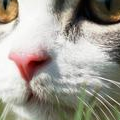

In [22]:
cv2_imshow(img[240:360, 490:610])

In [37]:
img = region_img.copy()

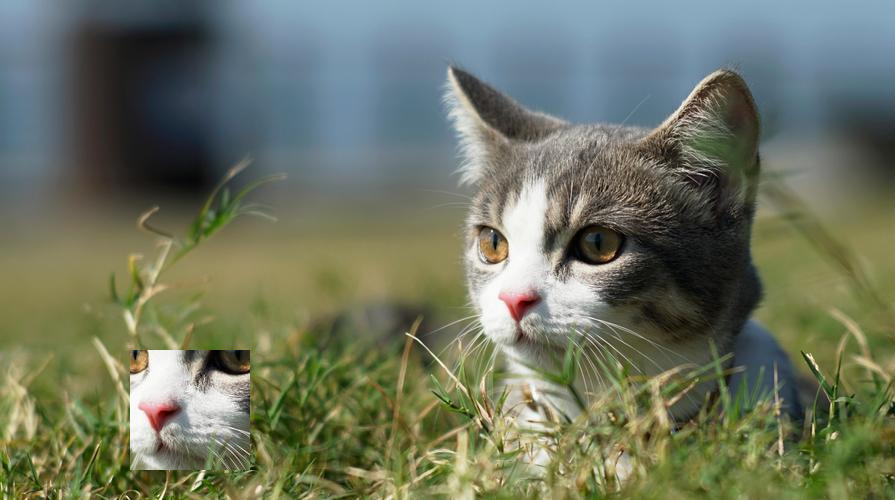

In [27]:
face = img[240:360, 490:610]
img[350:470, 130:250] = face
cv2_imshow(img)

分离三个通道的值

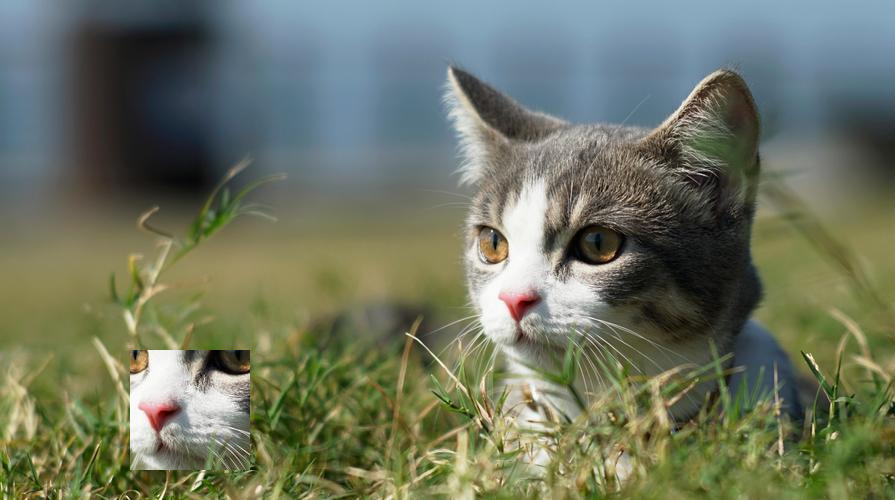

In [28]:
b, g, r = cv.split(region_img)
img = cv.merge((b, g, r))
cv2_imshow(img)

图像的算数运算

在图像的运算中最大值是255

In [29]:
# cv.add()
x = np.uint8([250])
y = np.uint8([10])
cv.add(x, y)  # 250+10=260=>255最大为255

array([[255]], dtype=uint8)

In [30]:
x+y # 260 % 256 = 4

array([4], dtype=uint8)

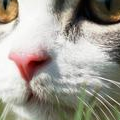

In [38]:
face = img[240:360, 490:610]
other = region_img[350:470, 130:250]
cv2_imshow(face)

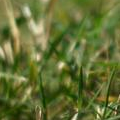

In [39]:
cv2_imshow(other)

numpy数组的赋值

In [34]:
a = np.array([1, 2, 3])
b = a
a[0] = 999
b

array([999,   2,   3])

In [35]:
a = np.array([1, 2, 3])
b = a.copy()
a[0] = 999
b

array([1, 2, 3])

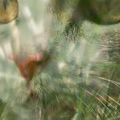

In [41]:
# 不同的权重相加
dst = cv.addWeighted(face, 0.5, other, 0.5, 0)
cv2_imshow(dst)

按位运算

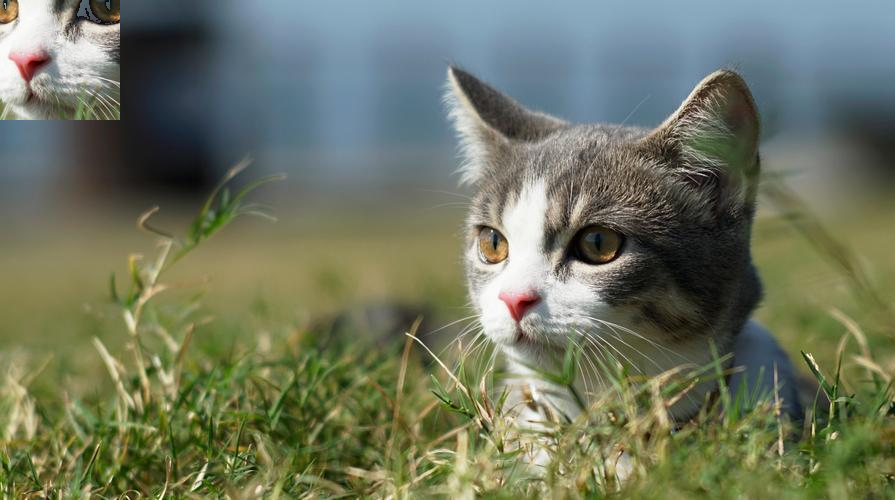

In [43]:
# 相当于将黑色的去掉了
rows, cols, channels = face.shape
roi = region_img[0:rows, 0:cols]

facegray = cv.cvtColor(face, cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(facegray, 10, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)

region_img_bg = cv.bitwise_and(roi, roi, mask=mask_inv)

face_fg = cv.bitwise_and(face, face, mask=mask)

dst = cv.add(region_img_bg, face_fg)
temp_img = region_img.copy()
temp_img[0:rows, 0:cols] = dst
cv2_imshow(temp_img)